# Confusion Matrix
A confusion matrix is a table that is often used to descibe the performance of a classication model on 
a set of test data for which the true values are known. It is a matrix of four different combinations of 
predictions and actual results ina binary classification problem, which are:
True positives (TP): The model correctly predicted the positive class.
False positives(FP):The model incorrectly predicted the positive class.
True negatives(TN): The model correcltly predicted the negative class.
False negatives(FN): The model incorrectly predicted the negative class.
Actual\Predicted	Positive	Negative
Positive	TP	FP
Negative	FN	TN

In [15]:
#importing the library
import numpy as np
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plotly
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')
test_df=pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv')

In [6]:
test_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


# Checking for Missing Values

In [8]:
df.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

# Creating the Preprocessing Function

In [18]:
def preprocess_inputs(df):
    df=df.copy()
    df=df.drop(df.columns[-1],axis=1)
    #splitting between x and y
    y=df['prognosis']
    x=df.drop('prognosis',axis=1)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
    #scaler
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    return x_train,x_test,y_train,y_test

In [19]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3444, 132)
(1476, 132)
(3444,)
(1476,)


# Training the Model

In [20]:
model=LogisticRegression()
model.fit(x_train,y_train)
print('Model',model.score(x_test,y_test))

Model 1.0


In [35]:
y_pred=model.predict(x_test)

In [37]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[33  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  0  0 ...  0  0 36]]


In [38]:
model.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

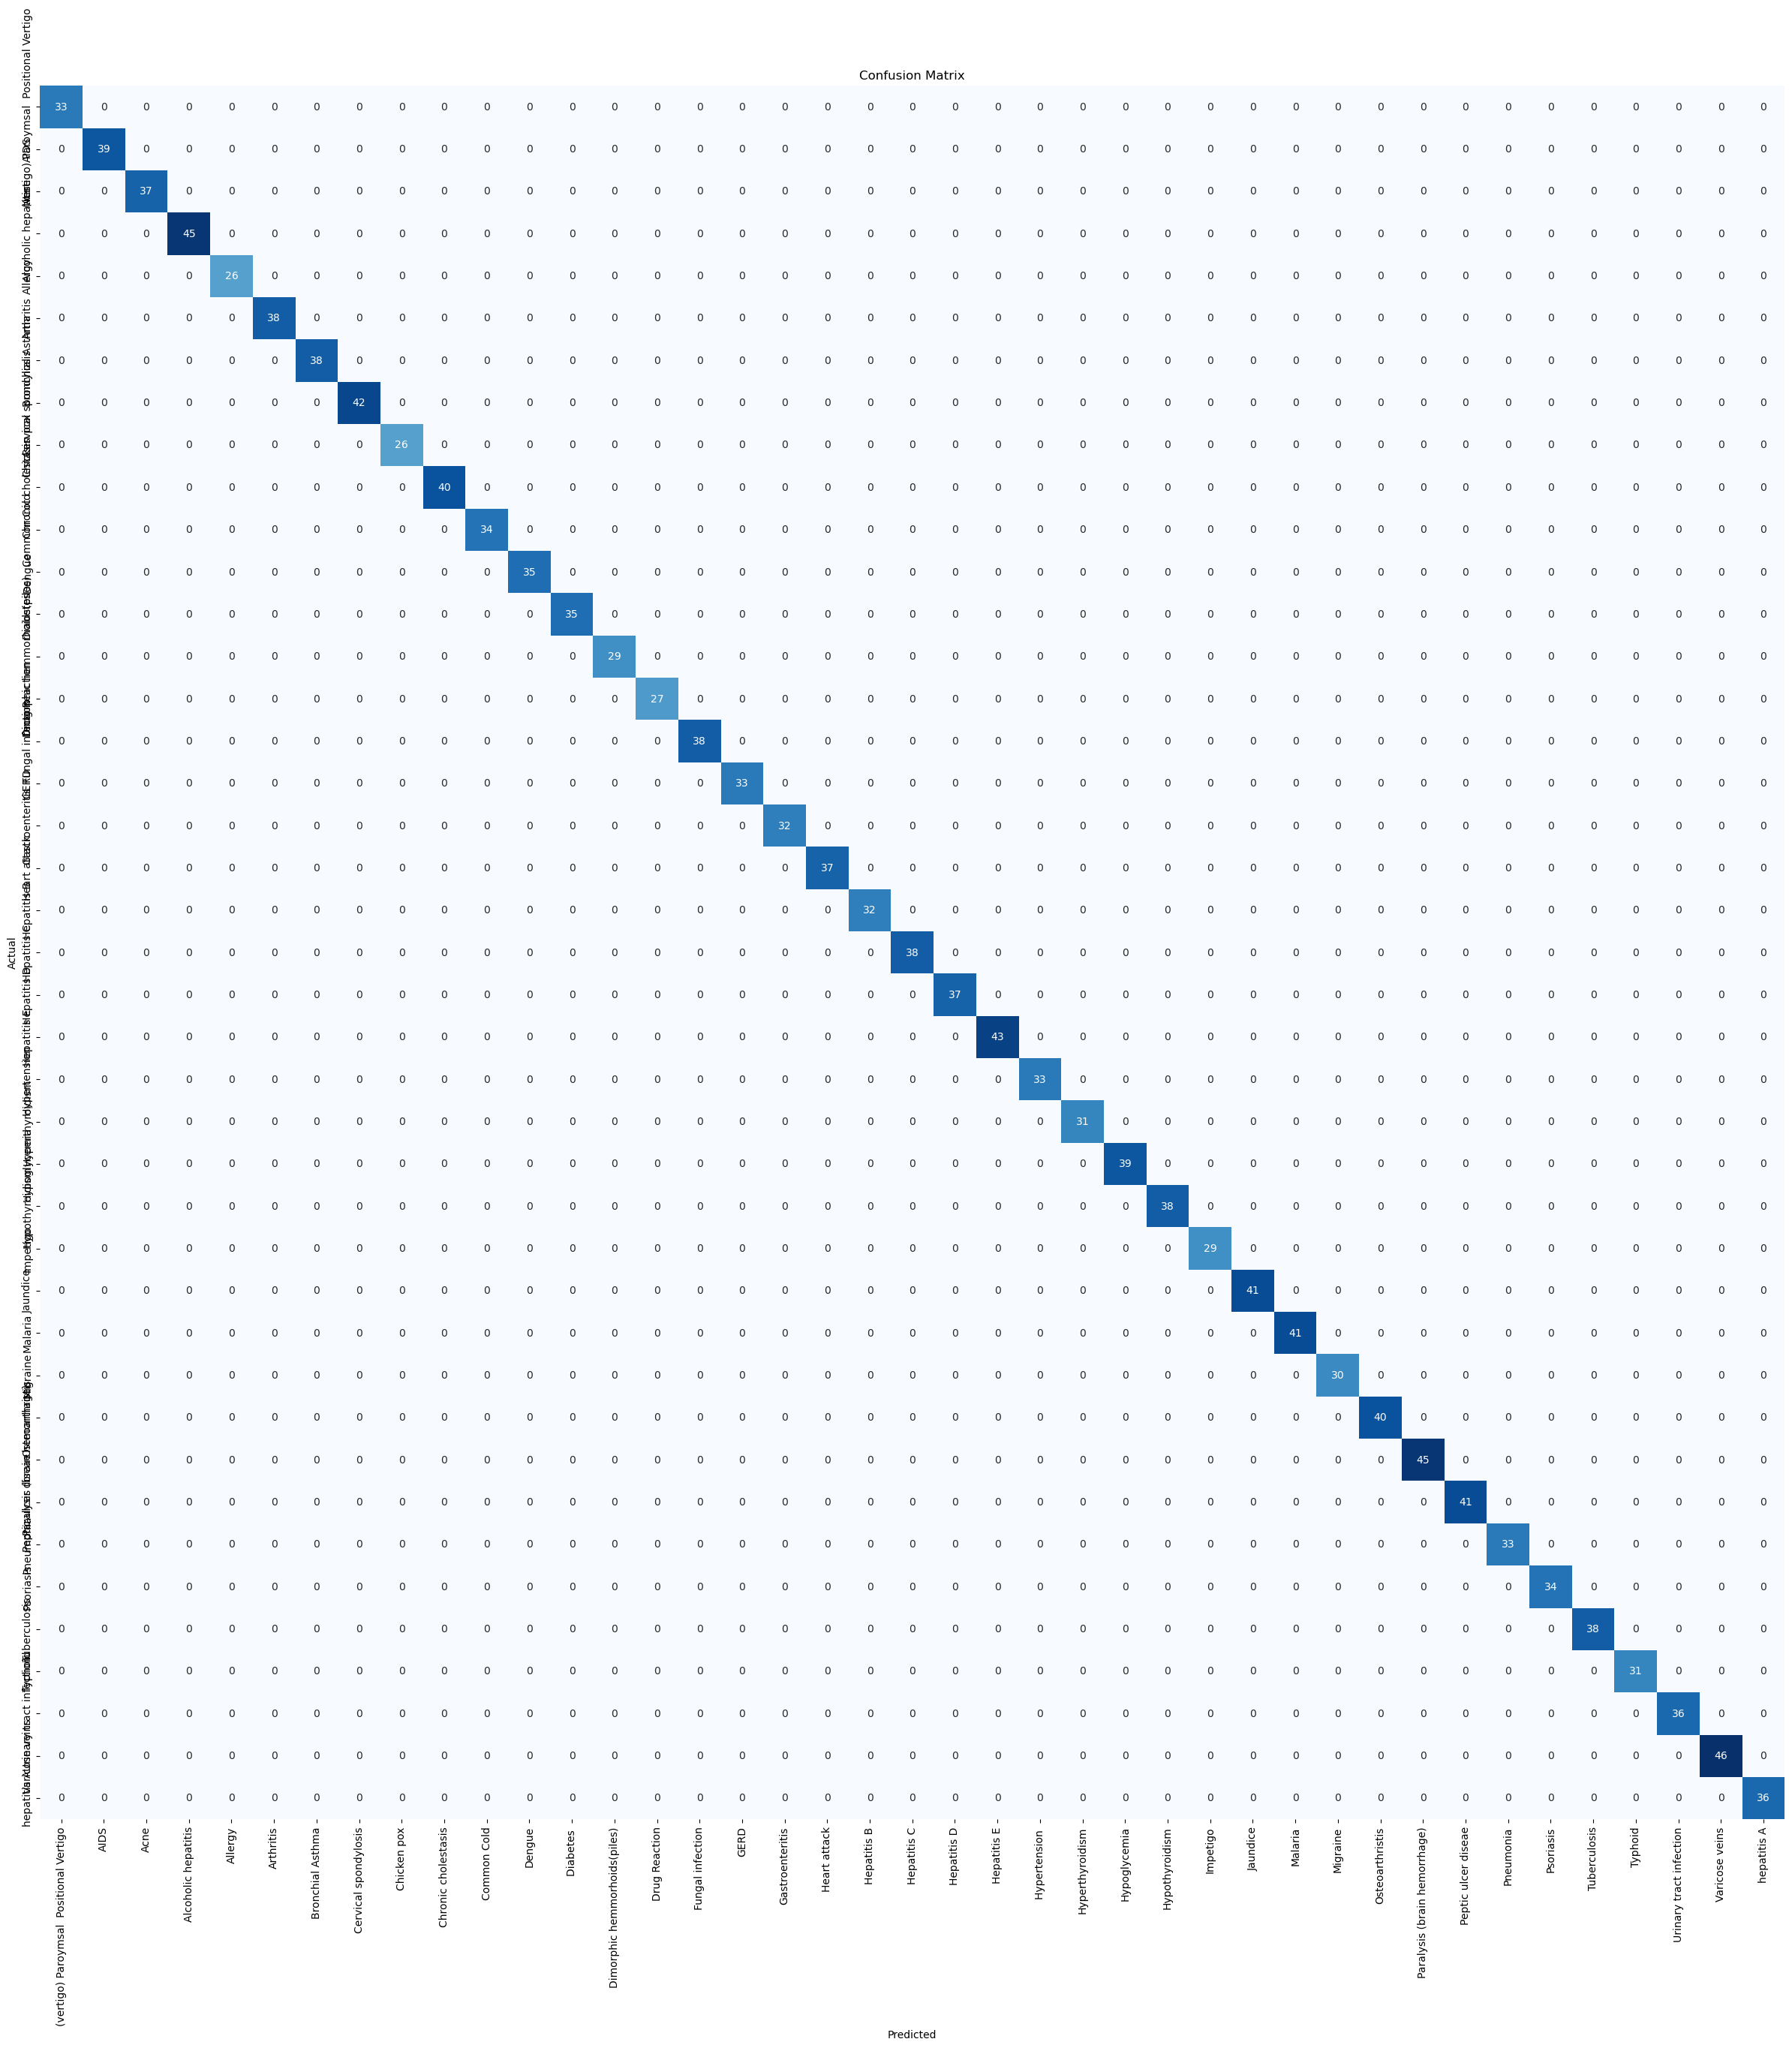

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues',cbar=False)
plt.xticks(np.arange(41)+0.5,model.classes_,rotation=90)
plt.yticks(np.arange(41)+0.5,model.classes_,rotation=90)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
y_test

933                Migraine
553                Jaundice
4156                Malaria
1416                Typhoid
1113           Heart attack
               ...         
247     Alcoholic hepatitis
648             Hepatitis E
3136            Hepatitis B
2727            Hepatitis C
4902            Hepatitis E
Name: prognosis, Length: 1476, dtype: object

In [31]:
model.coef_

array([[-0.06206113, -0.04795873, -0.01235694, ..., -0.01201025,
        -0.01122093, -0.01158645],
       [-0.05914846, -0.05984134, -0.01527205, ..., -0.02352088,
        -0.02194103, -0.02267128],
       [-0.07516775,  0.24950319, -0.02890454, ..., -0.02776172,
        -0.02593277, -0.02677744],
       ...,
       [-0.07354946, -0.07029818, -0.01148353, ..., -0.01228695,
        -0.01147664, -0.01185189],
       [-0.02569341, -0.02273295, -0.00616575, ..., -0.00623172,
        -0.00581805, -0.00600986],
       [-0.09567781, -0.0390535 , -0.00312492, ..., -0.00307302,
        -0.00287172, -0.00296508]])